# Understanding Descriptive Statistics

Import the necessary libraries here:

In [14]:
import pandas as pd
import numpy as np
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [56]:
def roll(number):
    return [random.randint(1, 6) for x in range(number)]

#### 2.- Plot the results sorted by value.

In [90]:
dice = roll(10)
# ignore the error! i fixed it, but if i reroll it changes my answers argh

TypeError: unsupported operand type(s) for +: 'range' and 'int'

In [88]:
dice_df = pd.DataFrame(dice, columns = ['Dice Output'])
dice_df

,Dice Output
0,2
1,3
2,1
3,2
4,5
5,2
6,5
7,6
8,2
9,6


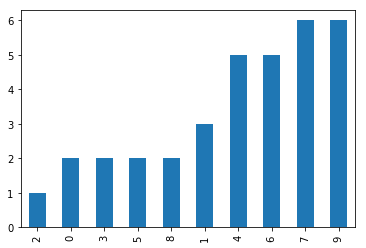

In [91]:
dice_df['Dice Output'].sort_values().plot(kind = 'bar')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

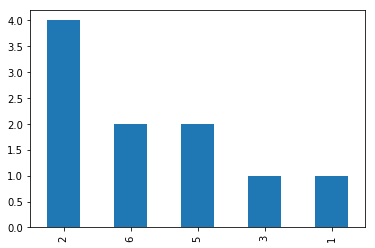

In [94]:
dice_df['Dice Output'].value_counts().plot(kind = 'bar')

In [64]:
# The data has a positive skew, meaning that the majority of the values are 
# on the left side of the plot and the median is 2.5. However, the
# mean is 3.4 due to the rolls of higher numbers such as 5 and 6.

# Plot one shows the frequency of each number at the time of rolling, while plot two
# shows the number of times that particular number as been shown. 

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [95]:
def mean(df):
    mean_value = df.sum()/len(df)
    return mean_value

mean(dice_df['Dice Output'])

3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [98]:
frequency = pd.DataFrame(dice_df['Dice Output'].value_counts())
frequency
mean(frequency)

Dice Output    2.0
dtype: float64

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [103]:
def medi_an(lst):
    n = len(lst)
    lst.sort_values()
    
    if n % 2 == 0:
        median1 = lst[n/2]
        median2 = lst[n/2 - 1]
        median = (median1 + median2)/2
        return median
    else:
        median = lst[n/2]
        return median
        
medi_an(dice_df['Dice Output'])

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [115]:
def q1(lst):
    return sorted(lst)[int(len(lst) * .25)]
def q2(lst):
    return sorted(lst)[int(len(lst)/2)]
def q3(lst):
    return sorted(lst)[int(len(lst) * .75)]

print(q1(dice_df['Dice Output']))
print(q2(dice_df['Dice Output']))
print(q3(dice_df['Dice Output']))

2
3
5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

roll     49.50
value     3.74
dtype: float64

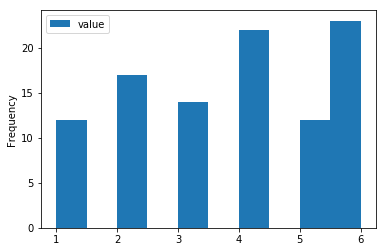

In [145]:
dice_hundred = pd.read_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Four\lab-understanding-descriptive-stats\data\roll_the_dice_hundred.csv", index_col = 0)
dice_hundred
dice_hundred.sort_values(by = 'value').plot(x = 'roll', y = 'value', kind = 'hist')
dice_hundred.mean()

In [ ]:
"""
The most frequent dice output is 6. The plot is negatively skewed due to the high
number of 4 and 6 values being rolled. 
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [135]:
def mean(df):
    mean_value = df.sum()/len(df)
    return mean_value

mean(dice_hundred['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [141]:
frequency = pd.DataFrame(dice_hundred['value'].value_counts())
frequency
mean(frequency)

value    16.666667
dtype: float64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

value    16.666667
dtype: float64
value    0.472282
dtype: float64


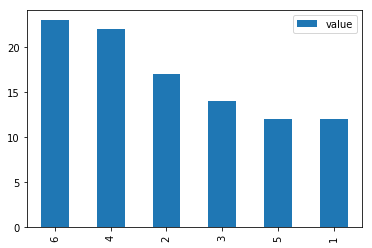

In [143]:
frequency.plot.bar()
print(df.mean())
print(frequency.skew())

In [ ]:
"""
The histogram is skewed positively, indicating a greater number of "higher"
values. The mean resides at 16.6667 and 3.74 for the frequency and number
rolled respectively, indicating it's in the centre of the histogram.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

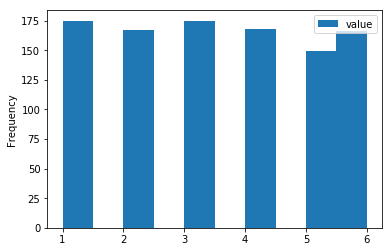

In [146]:
dice_thousand = pd.read_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Four\lab-understanding-descriptive-stats\data\roll_the_dice_thousand.csv", index_col = 0)
dice_thousand
dice_thousand.sort_values(by = 'value').plot(x = 'roll', y = 'value', kind = 'hist')

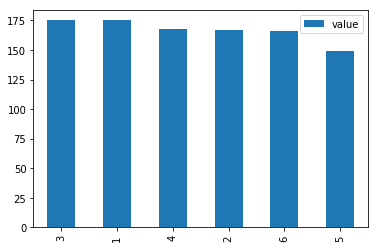

In [147]:
frequency = pd.DataFrame(dice_thousand['value'].value_counts())
frequency.plot.bar()

In [148]:
"""
The histogram is more evenly distributed with less discrepancy between the 
maximum values and the minimum values. Rolling a dice is an example of 
discrete distribution as each roll is independant of each other, thus the 
likelihood of numbers between 1 and 6 is equally as likely each time,
even if the Gambler's fallacy may suggest otherwise.
"""

"\nThe histogram is more evenly distributed with less discrepancy between the \nmaximum values and the minimum values. Rolling a dice is an example of \ndiscrete distribution as each roll is independant of each other, thus the \nlikelihood of numbers between 1 and 6 is equally as likely each time,\neven if the Gambler's fallacy may suggest otherwise.\n"

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [178]:

'''My guess is that they the standard dev is going to be around 10,
and the mean will be around 40'''

'My guess is that they the standard dev is going to be around 10,\nand the mean will be around 40'

,observation
count,72.000000
mean,13.888889
std,11.261996
min,1.000000
25%,3.000000
50%,11.500000
75%,23.000000
max,45.000000


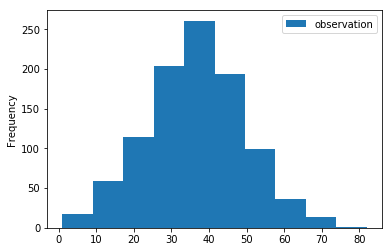

In [179]:
ages = pd.read_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Four\lab-understanding-descriptive-stats\data\ages_population.csv")
frequency = pd.DataFrame(ages['observation'].value_counts())
ages.plot.hist()
frequency.describe()


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [163]:
print('Mean',frequency.mean())
print('Std Dev',frequency.std())
print('Mean',ages.mean())
print('Std Dev',ages.std())

Mean observation    13.888889
dtype: float64
Std Dev observation    11.261996
dtype: float64
Mean observation    36.56
dtype: float64
Std Dev observation    12.8165
dtype: float64


In [ ]:
"""
They values are in line with what I predicted. 
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

,observation
count,18.000000
mean,55.555556
std,48.144662
min,2.000000
25%,14.000000
50%,38.000000
75%,96.000000
max,139.000000


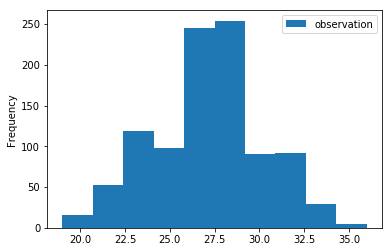

In [176]:
ages2 = pd.read_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Four\lab-understanding-descriptive-stats\data\ages_population2.csv")
frequency = pd.DataFrame(ages2['observation'].value_counts())
ages2.plot.hist()
frequency.describe()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The age distribution is much narrower.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [168]:
print('Mean',frequency.mean())
print('Std Dev',frequency.std())
print('Mean',ages2.mean())
print('Std Dev',ages2.std())

Mean observation    55.555556
dtype: float64
Std Dev observation    48.144662
dtype: float64
Mean observation    27.155
dtype: float64
Std Dev observation    2.969814
dtype: float64


In [ ]:
"""
The standard deviation is significantly higher, in addition to the mean. 
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

,observation
count,75.000000
mean,13.333333
std,8.726061
min,1.000000
25%,6.000000
50%,13.000000
75%,19.000000
max,37.000000


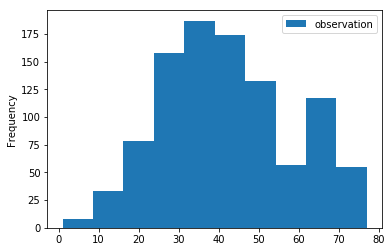

In [175]:
ages3 = pd.read_csv(r"C:\Users\Gareth\Desktop\Ironhack\Week_Four\lab-understanding-descriptive-stats\data\ages_population3.csv")
frequency = pd.DataFrame(ages3['observation'].value_counts())
ages3.plot.hist()
frequency.describe()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [173]:
print('Mean',frequency.mean())
print('Std Dev',frequency.std())
print('Mean',ages3.mean())
print('Std Dev',ages3.std())

Mean observation    55.555556
dtype: float64
Std Dev observation    48.144662
dtype: float64
Mean observation    41.989
dtype: float64
Std Dev observation    16.144706
dtype: float64


In [ ]:
"""
The standard deviation has increased as has the mean value. The data is 
skewed by additional data in the higher regions (ie: more older people)
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [181]:
print('median', frequency.median())
print('mean', frequency.mean())
print('std dev', frequency.std())

median observation    11.5
dtype: float64
mean observation    13.888889
dtype: float64
std dev observation    11.261996
dtype: float64


In [ ]:
"""
The data is more evenly distributed. Therefore the mean and median and closer.
There is less skew in the values
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [182]:
frequency.quantile([0.2, 0.4, 0.6, 0.8])

,observation
0.2,2.2
0.4,8.0
0.6,15.6
0.8,24.8


In [183]:
"""
Gives an idea of the evenness of the distribution of the data
"""

'\nGives an idea of the evenness of the distribution of the data\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""